In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
df=pd.read_csv('/content/bioethanol_growth_prediction_dataset (2).csv')
df.head()

,Year,Country,Feedstock_Yield,Production_Capacity,Processing_Tech_Efficiency,Energy_Consumption,Feedstock_Cost,Transportation_Cost,Distribution_Cost,Carbon_Emissions,Water_Usage,Market_Demand,Price_Per_Gallon,Govt_Incentive,Bioethanol_Growth
0,2006,India,2.766572,249.130200,0.772124,517.143441,260.441717,7.717721,13.772825,7.291060,381.996986,135.051670,4.024148,0,8.150095
1,2019,China,1.533572,176.532346,0.913276,544.416454,268.689141,7.555860,13.621001,7.120926,238.718341,103.899826,2.518926,1,12.416033
2,2014,USA,1.657324,222.741136,0.724174,502.964935,102.818945,6.325764,18.007825,4.484803,273.691594,148.865330,4.668453,1,12.475297
3,2010,Germany,3.513837,168.257357,0.943722,525.942246,160.028410,7.410925,13.016446,2.842151,412.670502,141.362535,1.685388,1,0.019686
4,2007,Germany,4.312922,241.210194,0.904388,500.320647,250.402703,6.507631,10.250654,7.354470,458.446288,113.285610,1.567951,1,13.898295


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27856 entries, 0 to 27855
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        27856 non-null  int64  
 1   Country                     27856 non-null  object 
 2   Feedstock_Yield             27856 non-null  float64
 3   Production_Capacity         27856 non-null  float64
 4   Processing_Tech_Efficiency  27856 non-null  float64
 5   Energy_Consumption          27856 non-null  float64
 6   Feedstock_Cost              27856 non-null  float64
 7   Transportation_Cost         27856 non-null  float64
 8   Distribution_Cost           27856 non-null  float64
 9   Carbon_Emissions            27856 non-null  float64
 10  Water_Usage                 27856 non-null  float64
 11  Market_Demand               27856 non-null  float64
 12  Price_Per_Gallon            27856 non-null  float64
 13  Govt_Incentive              278

In [ ]:
df.describe()

,Year,Feedstock_Yield,Production_Capacity,Processing_Tech_Efficiency,Energy_Consumption,Feedstock_Cost,Transportation_Cost,Distribution_Cost,Carbon_Emissions,Water_Usage,Market_Demand,Price_Per_Gallon,Govt_Incentive,Bioethanol_Growth
count,27856.000000,27856.000000,27856.000000,27856.000000,27856.000000,27856.000000,27856.000000,27856.000000,27856.000000,27856.000000,27856.000000,27856.000000,27856.000000,27856.000000
mean,2012.091147,3.011694,174.877020,0.824989,533.886302,200.868682,6.489656,14.515548,5.512601,337.165269,137.505327,2.989037,0.297315,7.479590
std,7.200210,0.867938,43.243752,0.072265,19.594724,57.818821,0.868188,2.599217,2.596249,79.768664,21.641341,1.156008,0.457084,4.332860
min,2000.000000,1.500143,100.021891,0.700057,500.000155,100.002183,5.000261,10.000294,1.000188,200.002466,100.002299,1.000046,0.000000,0.001521
25%,2006.000000,2.262934,137.524732,0.761865,516.990983,150.696578,5.735937,12.269307,3.248995,267.536682,118.661128,1.988629,0.000000,3.703338
50%,2012.000000,3.009696,174.666787,0.825207,533.681133,201.608321,6.484343,14.534611,5.522230,337.195934,137.469104,2.992024,0.000000,7.459303
75%,2018.000000,3.772975,212.198411,0.887215,550.794007,251.102927,7.242901,16.755360,7.760726,406.083642,156.216888,3.991377,1.000000,11.246743
max,2024.000000,4.499685,249.986797,0.949979,567.995634,299.996839,7.999880,18.999739,9.999618,474.999811,174.999813,4.999775,1.000000,14.998868


In [ ]:
df.isna().sum()

,0
Year,0
Country,0
Feedstock_Yield,0
Production_Capacity,0
Processing_Tech_Efficiency,0
Energy_Consumption,0
Feedstock_Cost,0
Transportation_Cost,0
Distribution_Cost,0
Carbon_Emissions,0


In [ ]:
le=LabelEncoder()
df['Country']=le.fit_transform(df['Country'])
df['Country'].unique()

array([3, 1, 4, 2, 0])

In [ ]:
x=df.drop('Bioethanol_Growth',axis=1)
y=df['Bioethanol_Growth']

In [ ]:
x.head()

,Year,Country,Feedstock_Yield,Production_Capacity,Processing_Tech_Efficiency,Energy_Consumption,Feedstock_Cost,Transportation_Cost,Distribution_Cost,Carbon_Emissions,Water_Usage,Market_Demand,Price_Per_Gallon,Govt_Incentive
0,2006,3,2.766572,249.130200,0.772124,517.143441,260.441717,7.717721,13.772825,7.291060,381.996986,135.051670,4.024148,0
1,2019,1,1.533572,176.532346,0.913276,544.416454,268.689141,7.555860,13.621001,7.120926,238.718341,103.899826,2.518926,1
2,2014,4,1.657324,222.741136,0.724174,502.964935,102.818945,6.325764,18.007825,4.484803,273.691594,148.865330,4.668453,1
3,2010,2,3.513837,168.257357,0.943722,525.942246,160.028410,7.410925,13.016446,2.842151,412.670502,141.362535,1.685388,1
4,2007,2,4.312922,241.210194,0.904388,500.320647,250.402703,6.507631,10.250654,7.354470,458.446288,113.285610,1.567951,1


In [ ]:
y.head()

,Bioethanol_Growth
0,8.150095
1,12.416033
2,12.475297
3,0.019686
4,13.898295


In [ ]:
scale=StandardScaler()
x=scale.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
lm=LinearRegression()
lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('Mean Squared Error:',mse)
print('R2 Score:',r2)

Mean Squared Error: 19.27827406711471
R2 Score: -0.0006992411730211145


In [ ]:
forrest=RandomForestRegressor()
forrest.fit(x_train,y_train)
y_pred=forrest.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('Mean Squared Error:',mse)
print('R2 Score:',r2)

Mean Squared Error: 19.659222378692615
R2 Score: -0.020473557327828296


In [ ]:
svr=SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('Mean Squared Error:',mse)
print('R2 Score:',r2)

Mean Squared Error: 19.76202117703418
R2 Score: -0.02580965116775258


<Axes: >

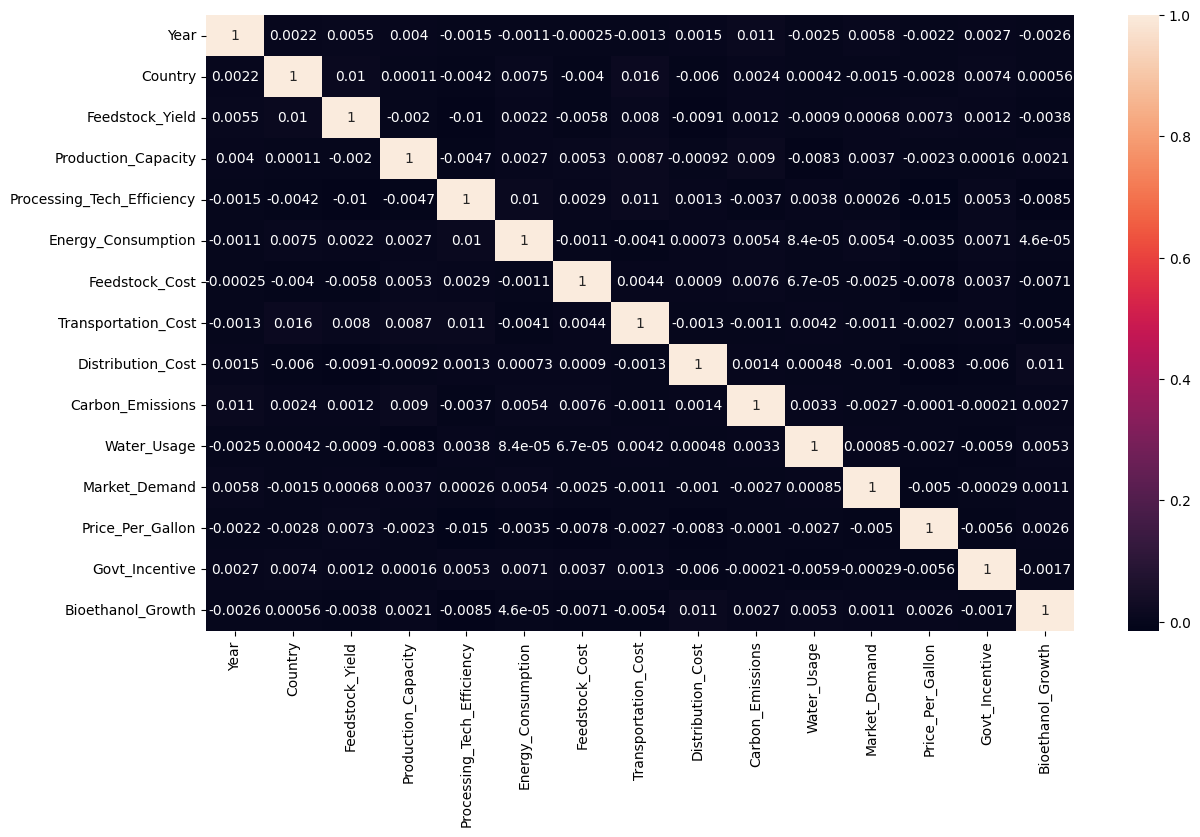

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.columns

Index(['Year', 'Country', 'Feedstock_Yield', 'Production_Capacity',
       'Processing_Tech_Efficiency', 'Energy_Consumption', 'Feedstock_Cost',
       'Transportation_Cost', 'Distribution_Cost', 'Carbon_Emissions',
       'Water_Usage', 'Market_Demand', 'Price_Per_Gallon', 'Govt_Incentive',
       'Bioethanol_Growth'],
      dtype='object')

In [ ]:
print(le.classes_)

['Brazil' 'China' 'Germany' 'India' 'USA']


In [ ]:
'''
year = int(input("Enter Year: "))
country = input("Enter Country: 0 for Brazil, 1 for China, 2 for Germany, 3 for India, 4 for USA "))
feedstock_yield = float(input("Enter Feedstock Yield (tons/acre): "))
prod_cap = float(input("Enter Production Capacity: "))
processing_eff = float(input("Enter Processing Tech Efficiency (%): "))
energy_cons = float(input("Enter Energy Consumption (MJ/gal): "))
feedstock_cost = float(input("Enter Feedstock Cost ($/ton): "))
transport_cost = float(input("Enter Transportation Cost ($): "))
distribution_cost = float(input("Enter Distribution Cost ($): "))
carbon_emissions = float(input("Enter Carbon Emissions (kg CO2/gal): "))
water_usage = float(input("Enter Water Usage (liters/gal): "))
market_demand = float(input("Enter Market Demand (million gallons): "))
price_per_gallon = float(input("Enter Price Per Gallon ($): "))
govt_incentive = float(input("Enter Govt Incentive ($/gal): "))

# Put into DataFrame
new_conditions = pd.DataFrame({
    'Year': [year],
    'Country': [country],
    'Feedstock_Yield': [feedstock_yield],
    'Production_Capacity': [prod_cap],
    'Processing_Tech_Efficiency': [processing_eff],
    'Energy_Consumption': [energy_cons],
    'Feedstock_Cost': [feedstock_cost],
    'Transportation_Cost': [transport_cost],
    'Distribution_Cost': [distribution_cost],
    'Carbon_Emissions': [carbon_emissions],
    'Water_Usage': [water_usage],
    'Market_Demand': [market_demand],
    'Price_Per_Gallon': [price_per_gallon],
    'Govt_Incentive': [govt_incentive]
})
new_conditions=scale.transform(new_conditions)
# Prediction
predicted_forrest = forrest.predict(new_conditions)
predicted_lm = lm.predict(new_conditions)
predicted_svr = svr.predict(new_conditions)
print("Predicted Bioethanol Growth (Random Forest):", predicted_forrest[0])
print("Predicted Bioethanol Growth (Linear Regression):", predicted_lm[0])
print("Predicted Bioethanol Growth (SVR):", predicted_svr[0])
'''

'\nyear = int(input("Enter Year: "))\ncountry = input("Enter Country: 0 for Brazil, 1 for China, 2 for Germany, 3 for India, 4 for USA "))\nfeedstock_yield = float(input("Enter Feedstock Yield (tons/acre): "))\nprod_cap = float(input("Enter Production Capacity: "))\nprocessing_eff = float(input("Enter Processing Tech Efficiency (%): "))\nenergy_cons = float(input("Enter Energy Consumption (MJ/gal): "))\nfeedstock_cost = float(input("Enter Feedstock Cost ($/ton): "))\ntransport_cost = float(input("Enter Transportation Cost ($): "))\ndistribution_cost = float(input("Enter Distribution Cost ($): "))\ncarbon_emissions = float(input("Enter Carbon Emissions (kg CO2/gal): "))\nwater_usage = float(input("Enter Water Usage (liters/gal): "))\nmarket_demand = float(input("Enter Market Demand (million gallons): "))\nprice_per_gallon = float(input("Enter Price Per Gallon ($): "))\ngovt_incentive = float(input("Enter Govt Incentive ($/gal): "))\n\n# Put into DataFrame\nnew_conditions = pd.DataFrame(